# 1. Feature Selection

In [1]:
from collections import Counter
from functools import reduce
from itertools import islice

from wordcloud import WordCloud
from tqdm import tqdm

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


def take(n, iterable):
    return list(islice(iterable, n))

In [2]:
df_data = pd.read_csv("../data/aapl_us_equities_news_proc_data.csv")
df_text = pd.read_csv("../data/aapl_us_equities_news_proc_text.csv")

In [3]:
df_data.head(5)

,id,ticker,title,category,content,date,provider,url,open,high,low,close,adj_close,volume,target
0,290924,AAPL,Waiting For Direction On The Markets,opinion,This stock market has been a difficult one for...,2012-07-16,Cam Hui,https://www.investing.com/analysis/waiting-for...,21.611429,21.843571,21.607857,21.675358,18.507113,301260400,1
1,290925,AAPL,Mid Year Update U S And Canadian Stock Marke...,opinion,From 2004 to 2010 the TSX 300 Index of leading...,2012-07-19,Baskin Financial Blog,https://www.investing.com/analysis/mid-year-up...,21.831429,21.976786,21.642857,21.940001,18.733074,436861600,1
2,290928,AAPL,Trade Apple After Earnings,opinion,It may look like a spider web but the mishmas...,2012-07-23,Abigail Doolittle,https://www.investing.com/analysis/trade-apple...,21.228571,21.639286,20.989643,21.565357,18.413191,487975600,1
3,290927,AAPL,Apple Earnings Preview Quarterly Dip On Deck,opinion,Last quarter Apple AAPL reported the 2nd bes...,2012-07-23,David Dyer,https://www.investing.com/analysis/apple-earni...,21.228571,21.639286,20.989643,21.565357,18.413191,487975600,1
4,290926,AAPL,Summer Heat Scorches Europe And U S,opinion,Europe flares as summer heat continues Summer...,2012-07-23,John Nyaradi,https://www.investing.com/analysis/summer-heat...,21.228571,21.639286,20.989643,21.565357,18.413191,487975600,1


In [4]:
df_text.head(5)

,text,target
0,wait direction stock market difficult alike di...,1
1,mid year update stock sector index lead stock ...,1
2,trade apple earning apple earning preview quar...,1
3,market bait switch sound go hear soon crowd fa...,0
4,fall tree apple quarter weakness economy pause...,1


In [5]:
%%time
all_text = reduce(lambda x, y: x + " " + y, df_text["text"])
all_positive_text = reduce(lambda x, y: x + " " + y, df_text[df_text["target"] == 1]["text"])
all_negative_text = reduce(lambda x, y: x + " " + y, df_text[df_text["target"] == 0]["text"])

CPU times: user 2.6 s, sys: 2.61 s, total: 5.21 s
Wall time: 5.22 s


## 1.1 World cloud

### 1.1.1 All documents

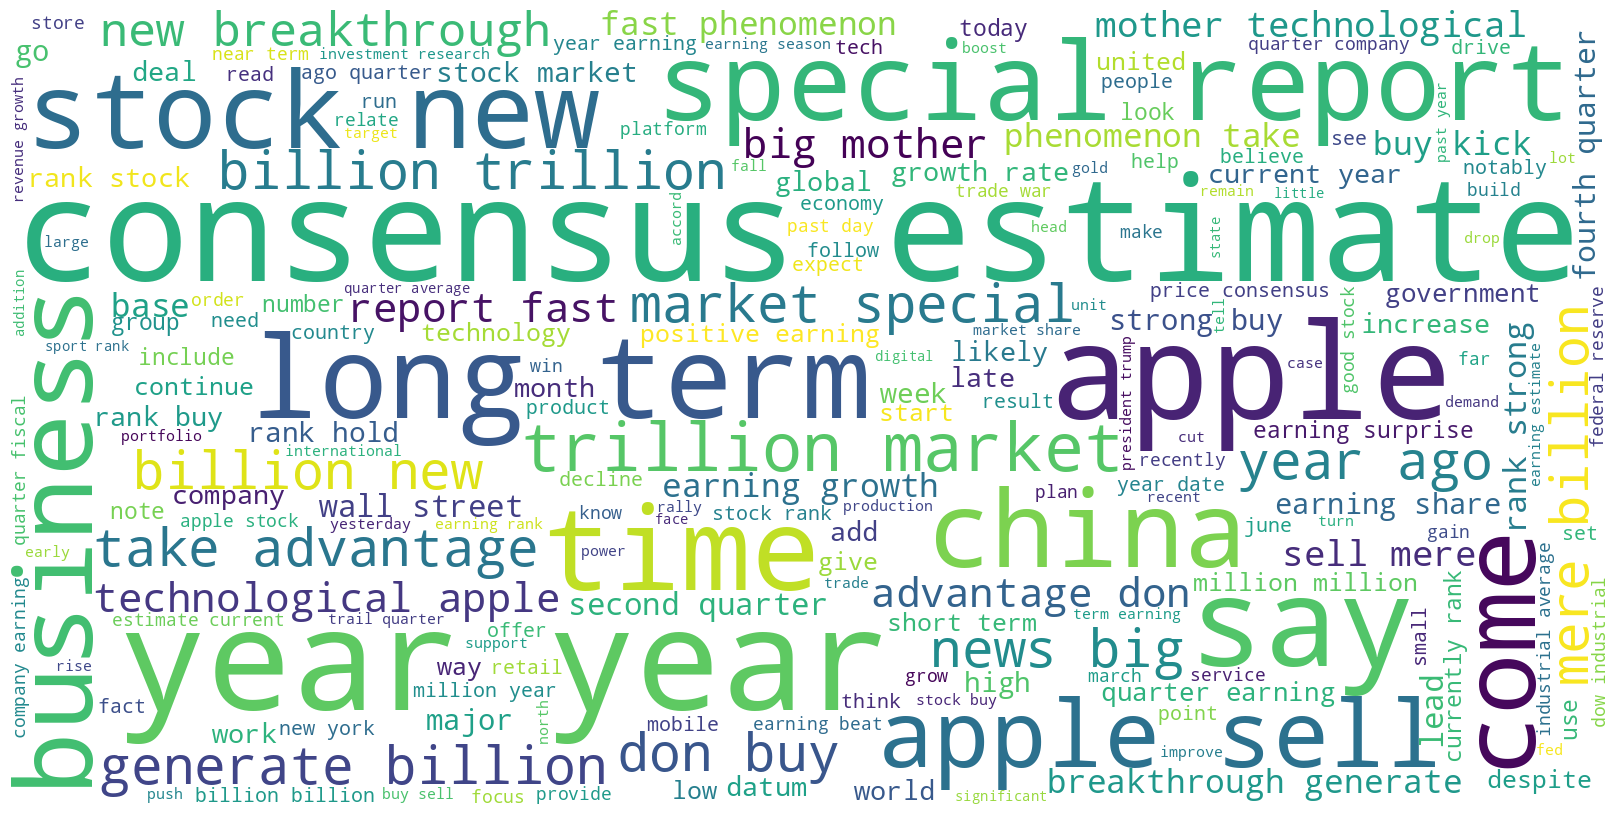

CPU times: user 13.2 s, sys: 610 ms, total: 13.9 s
Wall time: 13.5 s


In [6]:
%%time
word_cloud = WordCloud(
    width=1600,
    height=800,
    background_color="white",
    min_font_size=10,
).generate(all_text)

plt.figure(figsize=(16, 8), facecolor=None)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### 1.1.2 Positive documents

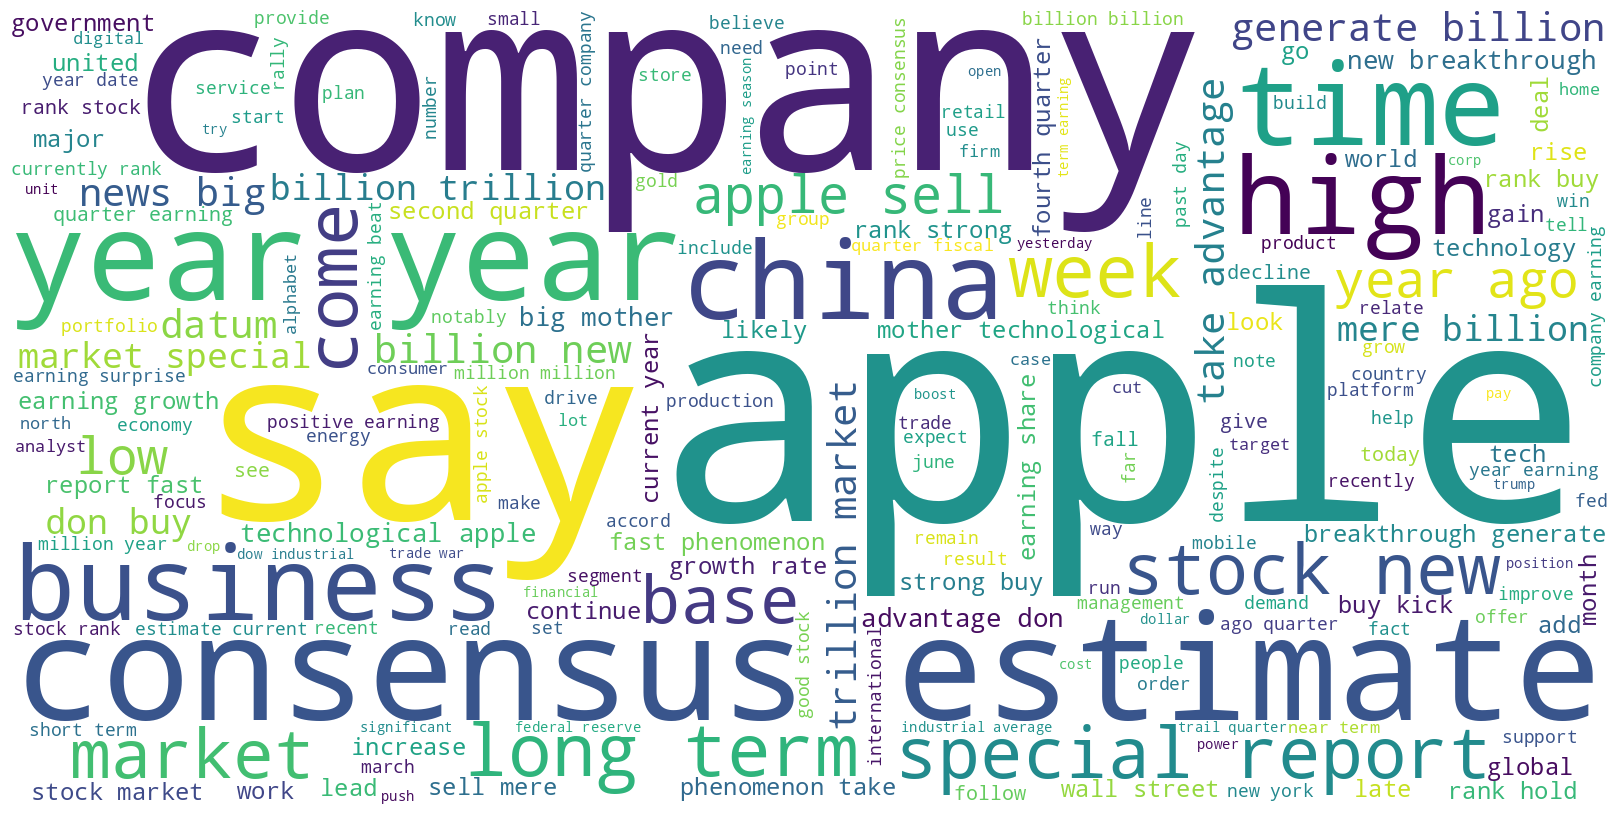

CPU times: user 8.08 s, sys: 466 ms, total: 8.55 s
Wall time: 8.23 s


In [7]:
%%time
word_cloud = WordCloud(
    width=1600,
    height=800,
    background_color="white",
    min_font_size=10,
).generate(all_positive_text)

plt.figure(figsize=(16, 8), facecolor=None)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### 1.1.3 Negative documents

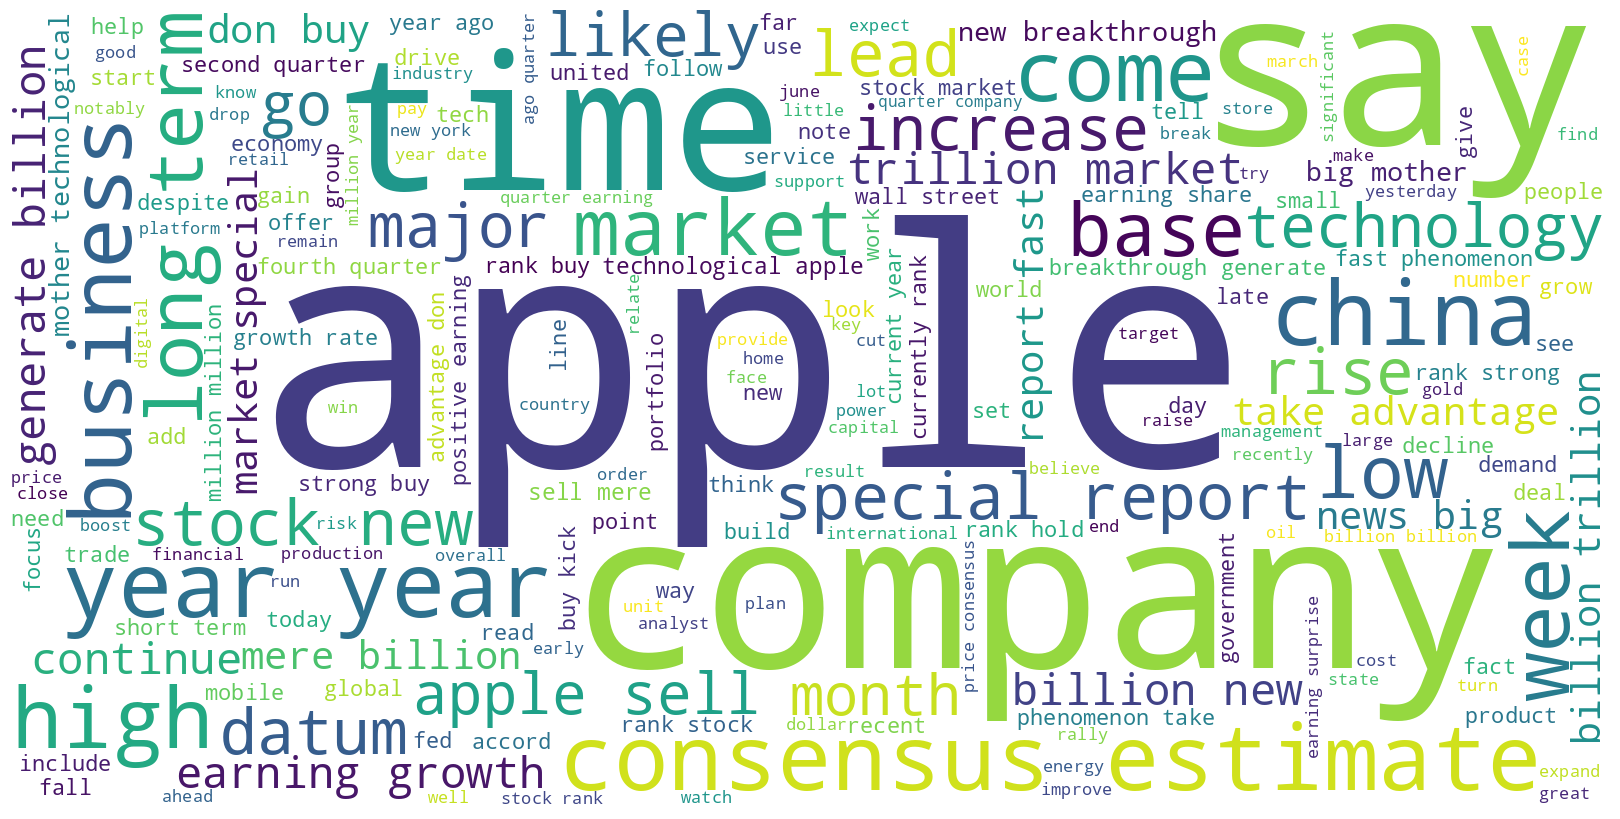

CPU times: user 7.85 s, sys: 488 ms, total: 8.34 s
Wall time: 7.98 s


In [8]:
%%time
word_cloud = WordCloud(
    width=1600,
    height=800,
    background_color="white",
    min_font_size=10,
).generate(all_negative_text)

plt.figure(figsize=(16, 8), facecolor=None)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## 1.2 Count words

### 1.2.1 All documents

In [9]:
%%time
all_text_counter = Counter(all_text.split(" "))

CPU times: user 478 ms, sys: 51 ms, total: 529 ms
Wall time: 527 ms


In [10]:
all_text_counter.most_common(50)

[('stock', 61383),
 ('year', 57273),
 ('apple', 54309),
 ('company', 50401),
 ('earning', 42109),
 ('market', 39011),
 ('quarter', 36274),
 ('billion', 32089),
 ('growth', 27613),
 ('new', 27371),
 ('say', 26484),
 ('million', 24881),
 ('high', 23999),
 ('rank', 21367),
 ('buy', 18937),
 ('day', 18936),
 ('time', 17999),
 ('price', 17558),
 ('share', 15359),
 ('report', 15022),
 ('percent', 14619),
 ('big', 14576),
 ('china', 14565),
 ('estimate', 14427),
 ('sell', 14398),
 ('rise', 14289),
 ('consensus', 13742),
 ('trade', 13717),
 ('week', 13578),
 ('strong', 13518),
 ('low', 13202),
 ('like', 12995),
 ('industry', 12829),
 ('index', 12786),
 ('long', 12767),
 ('come', 12721),
 ('technology', 12682),
 ('good', 12508),
 ('business', 11638),
 ('average', 11573),
 ('past', 11360),
 ('revenue', 11214),
 ('term', 11164),
 ('fall', 11163),
 ('rate', 10871),
 ('news', 10812),
 ('datum', 10685),
 ('look', 10656),
 ('end', 10491),
 ('investment', 10251)]

### 1.2.2 Positive documents

In [11]:
%%time
all_positive_text_counter = Counter(all_positive_text.split(" "))

CPU times: user 260 ms, sys: 449 µs, total: 260 ms
Wall time: 259 ms


In [12]:
all_positive_text_counter.most_common(50)

[('stock', 33037),
 ('year', 31947),
 ('apple', 28660),
 ('company', 27836),
 ('earning', 23794),
 ('quarter', 20833),
 ('market', 20690),
 ('billion', 18140),
 ('growth', 14862),
 ('new', 14526),
 ('million', 14464),
 ('say', 13781),
 ('high', 12923),
 ('rank', 12060),
 ('buy', 10592),
 ('day', 10336),
 ('price', 9667),
 ('time', 9433),
 ('share', 8520),
 ('report', 8371),
 ('estimate', 8336),
 ('consensus', 8105),
 ('china', 7827),
 ('big', 7821),
 ('sell', 7786),
 ('rise', 7770),
 ('percent', 7576),
 ('trade', 7417),
 ('strong', 7407),
 ('week', 7166),
 ('like', 7047),
 ('industry', 6996),
 ('low', 6947),
 ('come', 6856),
 ('good', 6831),
 ('long', 6757),
 ('technology', 6739),
 ('index', 6664),
 ('average', 6462),
 ('past', 6331),
 ('revenue', 6266),
 ('business', 6206),
 ('news', 6016),
 ('term', 5954),
 ('rate', 5885),
 ('gain', 5746),
 ('fall', 5660),
 ('look', 5656),
 ('end', 5608),
 ('datum', 5574)]

### 1.2.3 Negative documents

In [13]:
%%time
all_negative_text_counter = Counter(all_negative_text.split(" "))

CPU times: user 230 ms, sys: 0 ns, total: 230 ms
Wall time: 231 ms


In [14]:
all_negative_text_counter.most_common(50)

[('stock', 28346),
 ('apple', 25649),
 ('year', 25326),
 ('company', 22565),
 ('market', 18321),
 ('earning', 18315),
 ('quarter', 15441),
 ('billion', 13949),
 ('new', 12845),
 ('growth', 12751),
 ('say', 12703),
 ('high', 11076),
 ('million', 10417),
 ('rank', 9307),
 ('day', 8600),
 ('time', 8566),
 ('buy', 8345),
 ('price', 7891),
 ('percent', 7043),
 ('share', 6839),
 ('big', 6755),
 ('china', 6738),
 ('report', 6651),
 ('sell', 6612),
 ('rise', 6519),
 ('week', 6412),
 ('trade', 6300),
 ('low', 6255),
 ('index', 6122),
 ('strong', 6111),
 ('estimate', 6091),
 ('long', 6010),
 ('like', 5948),
 ('technology', 5943),
 ('come', 5865),
 ('industry', 5833),
 ('good', 5677),
 ('consensus', 5637),
 ('fall', 5503),
 ('business', 5432),
 ('term', 5210),
 ('average', 5111),
 ('datum', 5111),
 ('past', 5029),
 ('investment', 5021),
 ('look', 5000),
 ('rate', 4986),
 ('revenue', 4948),
 ('tech', 4918),
 ('end', 4883)]

## 1.3 Calculate TF-IDF (per day)

### 1.3.1 Calculate DF

In [15]:
%%time
DF = {}

# For each word add the indices of the documents it occurs in
for idx, document in tqdm(df_text.iterrows()):
    tokens = document["text"].split(" ")
    
    for token in tokens:
        try:
            DF[token].add(idx)
        except:
            DF[token] = {idx}

# Count the nr of document indices for each word
DF = {token: len(indices) for token, indices in DF.items()}

1740it [00:00, 1897.73it/s]

CPU times: user 938 ms, sys: 3.75 ms, total: 942 ms
Wall time: 939 ms


### 1.3.2 Calculate TF-IDF

In [16]:
%%time
TF_IDF = {}

for idx, document in tqdm(df_text.iterrows()):
    tokens = document["text"].split(" ")
    counter = Counter(tokens)

    for token in np.unique(tokens):
        # nr of times word in document / total nr of words in document
        tf = counter[token] / len(tokens)

        # nr of documents word occurs in
        df = DF.get(token, 0)

        # log(nr of documents / nr of documents containing word)
        idf = np.log(len(df_text) / df)
        
        TF_IDF[idx, token] = tf * idf

1740it [00:04, 357.19it/s]

CPU times: user 4.87 s, sys: 21.5 ms, total: 4.89 s
Wall time: 4.87 s


In [17]:
take(50, TF_IDF.items())

[((0, 'activity'), 0.004443932589518568),
 ((0, 'add'), 0.0008857048934261507),
 ((0, 'addition'), 0.0020334870767447434),
 ((0, 'advice'), 0.0032069059786765486),
 ((0, 'afraid'), 0.008200465288677065),
 ((0, 'alike'), 0.007781783372228027),
 ((0, 'analysis'), 0.0036503182976000774),
 ((0, 'analyst'), 0.0014209783277571255),
 ((0, 'appear'), 0.0032486780400429937),
 ((0, 'apple'), 2.88242201312609e-06),
 ((0, 'approve'), 0.007340954634223856),
 ((0, 'article'), 0.005902286872871041),
 ((0, 'aside'), 0.005240607428774215),
 ((0, 'ask'), 0.004651223874467612),
 ((0, 'asset'), 0.0014209783277571255),
 ((0, 'author'), 0.004812974554010397),
 ((0, 'average'), 0.0006696830604216547),
 ((0, 'awfully'), 0.013489220176763756),
 ((0, 'bad'), 0.0013707004999749684),
 ((0, 'base'), 0.0012981413317560762),
 ((0, 'bear'), 0.005567692608991655),
 ((0, 'bearish'), 0.007626575411032792),
 ((0, 'bearishness'), 0.009160345620146003),
 ((0, 'bind'), 0.005485315372543428),
 ((0, 'bit'), 0.0022928696276893

In [18]:
%%time
TF_IDF_WORDS = {}

for (_, token), score in tqdm(TF_IDF.items()):
    TF_IDF_WORDS[token] = TF_IDF_WORDS.get(token, []) + [score]

TF_IDF_AVG = {token: sum(scores) / len(scores) for token, scores in TF_IDF_WORDS.items()}
TF_IDF_SUM = {token: sum(scores) for token, scores in TF_IDF_WORDS.items()}
                                     
TF_IDF_AVG = {token: score for token, score in sorted(TF_IDF_AVG.items(), key=lambda pair: pair[1], reverse=True)}
TF_IDF_SUM = {token: score for token, score in sorted(TF_IDF_SUM.items(), key=lambda pair: pair[1], reverse=True)}

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1204930/1204930 [00:03<00:00, 309794.74it/s]


CPU times: user 4.21 s, sys: 8.88 ms, total: 4.22 s
Wall time: 4.2 s


In [19]:
take(50, TF_IDF_AVG.items())

[('jive', 0.2072677886724604),
 ('recklessly', 0.16581423093796835),
 ('centimeter', 0.10221425194806266),
 ('rugged', 0.09026177893800695),
 ('faro', 0.08598561271431136),
 ('poodle', 0.08184614689808309),
 ('geophone', 0.07947309293476588),
 ('pedometer', 0.07854358307587973),
 ('bark', 0.07692412775472758),
 ('pontificate', 0.0761391876755977),
 ('cheerfully', 0.07367862152426513),
 ('sill', 0.07348352291666806),
 ('chum', 0.0678330944746234),
 ('dory', 0.0678330944746234),
 ('hunky', 0.0678330944746234),
 ('limitlessly', 0.0678330944746234),
 ('polygraph', 0.0678330944746234),
 ('trainload', 0.0678330944746234),
 ('unwary', 0.0678330944746234),
 ('logarithmic', 0.06708474604152598),
 ('nook', 0.061824752960194025),
 ('micromania', 0.059932854555892166),
 ('napa', 0.05554571011569659),
 ('obligatory', 0.05541455223747907),
 ('solvable', 0.05477944148411576),
 ('revelatory', 0.05110712597403133),
 ('neutralization', 0.05075945845039847),
 ('pictorial', 0.05075945845039847),
 ('anomal

In [20]:
take(50, TF_IDF_SUM.items())

[('percent', 4.2354893305937935),
 ('rank', 3.1282046441228863),
 ('earning', 3.050224744662618),
 ('quarter', 2.7804856986697803),
 ('blackberry', 2.458148914009352),
 ('china', 2.444817381404818),
 ('say', 2.3662187828337795),
 ('billion', 2.2454427074214087),
 ('fund', 2.2136803053224),
 ('resistance', 2.188806584471473),
 ('tax', 2.145966462051824),
 ('growth', 2.1388146714716174),
 ('trump', 2.125089834213801),
 ('million', 2.1017549411908028),
 ('fed', 2.040672178780981),
 ('estimate', 1.9949526290790511),
 ('index', 1.991840902111517),
 ('consensus', 1.9854877694476374),
 ('music', 1.9358227952333027),
 ('company', 1.91379535906529),
 ('gold', 1.9124889253054758),
 ('revenue', 1.8972460818010326),
 ('chart', 1.8909211530142604),
 ('oil', 1.795445604979929),
 ('trade', 1.7598152653976153),
 ('mobile', 1.7575442914020016),
 ('stock', 1.7508700427979034),
 ('dow', 1.649249068680042),
 ('yesterday', 1.6399394306962183),
 ('dividend', 1.6389693698116767),
 ('dollar', 1.63185711480924

## 1.4 Calculate TF-IDF (per target)

In [21]:
%%time
DF = {}

# For each word add the indices of the documents it occurs in
# NOTE: positive document is index: 0
# NOTE: negative document is index: 1
for idx, text in tqdm(enumerate([all_negative_text, all_positive_text])):
    tokens = text.split(" ")
    
    for token in tokens:
        try:
            DF[token].add(idx)
        except:
            DF[token] = {idx}

# Count the nr of document indices for each word
DF = {token: len(indices) for token, indices in DF.items()}

2it [00:00,  2.46it/s]

CPU times: user 772 ms, sys: 48.2 ms, total: 821 ms
Wall time: 818 ms


In [22]:
%%time
TF_IDF = {}

# NOTE: positive document is index: 0
# NOTE: negative document is index: 1
for idx, text in tqdm(enumerate([all_positive_text, all_negative_text])):
    tokens = text.split(" ")
    counter = Counter(tokens)

    for token in np.unique(tokens):
        # nr of times word in document / total nr of words in document
        tf = counter[token] / len(tokens)

        # nr of documents word occurs in
        df = DF.get(token, 0)

        # log(nr of documents / nr of documents containing word)
        idf = np.log(2 / df)
        
        TF_IDF[idx, token] = tf * idf
        
TF_IDF = sorted(TF_IDF.items(), key=lambda pair: pair[1], reverse=True)

2it [00:02,  1.02s/it]

CPU times: user 1.92 s, sys: 172 ms, total: 2.1 s
Wall time: 2.09 s


In [23]:
# Positive documents (doc = 0)
take(50, {(doc, token): value for (doc, token), value in TF_IDF if doc == 0}.items())

[((0, 'peloton'), 8.426305065212138e-06),
 ((0, 'hectoliter'), 5.729887444344253e-06),
 ((0, 'vail'), 5.729887444344253e-06),
 ((0, 'bombardi'), 5.392835241735768e-06),
 ((0, 'nude'), 5.392835241735768e-06),
 ((0, 'supercharger'), 5.392835241735768e-06),
 ((0, 'octave'), 5.055783039127283e-06),
 ((0, 'radiology'), 5.055783039127283e-06),
 ((0, 'prophylaxis'), 4.718730836518797e-06),
 ((0, 'xylem'), 4.718730836518797e-06),
 ((0, 'pembina'), 4.381678633910312e-06),
 ((0, 'tetra'), 4.381678633910312e-06),
 ((0, 'blah'), 4.044626431301827e-06),
 ((0, 'cochlear'), 4.044626431301827e-06),
 ((0, 'sip'), 4.044626431301827e-06),
 ((0, 'tenable'), 4.044626431301827e-06),
 ((0, 'meningococcal'), 3.7075742286933405e-06),
 ((0, 'diarrhea'), 3.3705220260848556e-06),
 ((0, 'dispense'), 3.3705220260848556e-06),
 ((0, 'folio'), 3.3705220260848556e-06),
 ((0, 'geometric'), 3.3705220260848556e-06),
 ((0, 'kern'), 3.3705220260848556e-06),
 ((0, 'logically'), 3.3705220260848556e-06),
 ((0, 'octopus'), 3.37

In [24]:
# Negative documents (doc = 1)
take(50, {(doc, token): value for (doc, token), value in TF_IDF if doc == 1}.items())

[((1, 'embe'), 9.762097368144537e-06),
 ((1, 'kat'), 7.80967789451563e-06),
 ((1, 'paragon'), 7.419193999789848e-06),
 ((1, 'fam'), 7.028710105064067e-06),
 ((1, 'rasa'), 7.028710105064067e-06),
 ((1, 'tabula'), 7.028710105064067e-06),
 ((1, 'slavery'), 5.076290631435159e-06),
 ((1, 'stag'), 5.076290631435159e-06),
 ((1, 'fission'), 4.685806736709377e-06),
 ((1, 'sabra'), 4.685806736709377e-06),
 ((1, 'sorghum'), 4.295322841983596e-06),
 ((1, 'ly'), 3.904838947257815e-06),
 ((1, 'moo'), 3.904838947257815e-06),
 ((1, 'pinker'), 3.904838947257815e-06),
 ((1, 'psychosis'), 3.904838947257815e-06),
 ((1, 'timid'), 3.904838947257815e-06),
 ((1, 'geophone'), 3.5143550525320334e-06),
 ((1, 'heater'), 3.5143550525320334e-06),
 ((1, 'madrigal'), 3.5143550525320334e-06),
 ((1, 'pert'), 3.5143550525320334e-06),
 ((1, 'rugged'), 3.5143550525320334e-06),
 ((1, 'telethon'), 3.5143550525320334e-06),
 ((1, 'dev'), 3.123871157806252e-06),
 ((1, 'halyard'), 3.123871157806252e-06),
 ((1, 'lagarto'), 3.123